<a href="https://colab.research.google.com/github/mion158/data-mining-assignments/blob/main/some_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from sklearn.datasets import load_breast_cancer, make_classification, make_blobs, make_regression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd

In [19]:
#make a random dataset
X, y = make_regression(n_samples = 100, n_features=1, n_informative=2, bias = 150, noise = 30, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
from sklearn.linear_model import LinearRegression
linreg = LinearRegression().fit(X_train, y_train)

print('coefficient: ', linreg.coef_)
print('intercept: ', linreg.intercept_)
print('R-squared score training: ', linreg.score(X_train,y_train))
print('R-squared score test: ', linreg.score(X_test,y_test))

coefficient:  [45.70870465]
intercept:  148.44575345658873
R-squared score training:  0.6785950771141656
R-squared score test:  0.4915961593493031


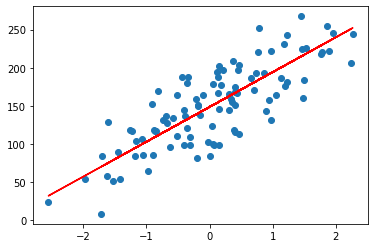

In [20]:
plt.scatter(X, y, marker = 'o')
plt.plot(X, linreg.coef_*X + linreg.intercept_, 'r-')

In [25]:
#multiple regression
data, labels = make_regression(n_samples = 100, n_features=5, n_informative=2, bias = 150, noise = 30, random_state=0)

training_data, test_data, training_labels, test_labels = train_test_split(data, labels, random_state=0)

linreg2 = LinearRegression().fit(training_data,training_labels)

print('coefficient: ', linreg2.coef_)
print('intercept: ', linreg2.intercept_)
print('R-squared score training: ', linreg2.score(training_data, training_labels))
print('R-squared score test: ', linreg2.score(test_data,test_labels))

coefficient:  [45.30444666 -5.84003719 98.49068547 -0.79179155  2.44598917]
intercept:  142.18019642536393
R-squared score training:  0.9311914653881985
R-squared score test:  0.853367120019873


In [28]:
#ridge regression 
from sklearn.linear_model import Ridge
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

linridge = Ridge(alpha=20.0).fit(X_train, y_train)
print('coefficient: ', linridge.coef_)
print('intercept: ', linridge.intercept_)
print('R-squared score training: ', linridge.score(X_train,y_train))
print('R-squared score test: ', linridge.score(X_test,y_test))
print('number of non-zero features: ', np.sum(linridge.coef_!=0))

coefficient:  [ 3.44928989e+01 -1.32019670e+00  7.62706118e+01 -2.30480396e-01
  1.75033092e-02]
intercept:  139.444669922855
R-squared score training:  0.8840252333663869
R-squared score test:  0.822274454535411
number of non-zero features:  5


In [34]:
#with feature normalization and regulization parameter alpha
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

for alpha in [0,10,50,100,1000]:
  linridge = Ridge(alpha = alpha).fit(X_train_scaled,y_train)
  r2_train = linridge.score(X_train_scaled,y_train)
  r2_test = linridge.score(X_test_scaled,y_test)
  num_big_coef = np.sum(abs(linridge.coef_)>1.0)
  print('alpha = {}, number of big coef = {}, r^2 training = {}, r^2 test = {}'.format(alpha, num_big_coef, r2_train, r2_test))

alpha = 0, number of big coef = 5, r^2 training = 0.9311914653881985, r^2 test = 0.39664285693492995
alpha = 10, number of big coef = 5, r^2 training = 0.4006785273352138, r^2 test = 0.3496450029801136
alpha = 50, number of big coef = 5, r^2 training = 0.11193804127389151, r^2 test = 0.05565672610360639
alpha = 100, number of big coef = 4, r^2 training = 0.05882713987609611, r^2 test = -0.0011106928551454232
alpha = 1000, number of big coef = 1, r^2 training = 0.0061647832731864805, r^2 test = -0.05786138774535754


In [35]:
#lasso regression
from sklearn.linear_model import Lasso

linlasso = Lasso(alpha=2.0, max_iter=10000).fit(X_train_scaled, y_train)
print('coefficient: ', linlasso.coef_)
print('intercept: ', linlasso.intercept_)
print('R-squared score training: ', linlasso.score(X_train,y_train))
print('R-squared score test: ', linlasso.score(X_test,y_test))
print('number of non-zero features: ', np.sum(linlasso.coef_!=0))

coefficient:  [158.97214846  -0.         411.53227553  -0.           0.        ]
intercept:  -192.82333707624554
R-squared score training:  -19.58532283724237
R-squared score test:  -20.033796771726532
number of non-zero features:  2


In [36]:
#with regularization parameter alpha
for alpha in [0,10,50,100,1000]:
  linlasso = Lasso(alpha = alpha, max_iter=10000).fit(X_train_scaled,y_train)
  r2_train = linlasso.score(X_train_scaled,y_train)
  r2_test = linlasso.score(X_test_scaled,y_test)
  num_nonzero_coef = np.sum(linlasso.coef_ != 0.0)
  print('alpha = {}, number of non-zero coef = {}, r^2 training = {}, r^2 test = {}'.format(alpha, num_nonzero_coef, r2_train, r2_test))

alpha = 0, number of non-zero coef = 5, r^2 training = 0.9311914653881985, r^2 test = 0.39664285693492785
alpha = 10, number of non-zero coef = 1, r^2 training = 0.5775360312412285, r^2 test = 0.42054395899934593
alpha = 50, number of non-zero coef = 0, r^2 training = 0.0, r^2 test = -0.06453008082670264
alpha = 100, number of non-zero coef = 0, r^2 training = 0.0, r^2 test = -0.06453008082670264
alpha = 1000, number of non-zero coef = 0, r^2 training = 0.0, r^2 test = -0.06453008082670264


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.025e+04, tolerance: 8.794e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge

In [38]:
#polynomial regression

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=0)

#many polynomial features may lead to overfitting so use regression with regularization penalty
linreg = Ridge().fit(X_train, y_train)

print('coefficient: ', linreg.coef_)
print('intercept: ', linreg.intercept_)
print('R-squared score training: ', linreg.score(X_train,y_train))
print('R-squared score test: ', linreg.score(X_test,y_test))

coefficient:  [  0.          43.74941261 -11.73883724 100.30296862  -0.40723712
   7.34225752   3.26507977   2.28212126  12.23839564   2.06022639
   1.55204574   1.50574872  -2.38276197   3.19939479  -4.99426805
  -0.18665899   2.4790342    5.44492236  -3.31084316   1.93019642
   2.41907746]
intercept:  137.72801950680173
R-squared score training:  0.9495412116797516
R-squared score test:  0.8409720604870493
